In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from os import chdir
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, roc_curve, precision_recall_curve

In [61]:
import os 
subdirectory_path = r"C:\Users\aadis\OneDrive\Desktop\beng\Dataset\Dataset"
os.chdir(subdirectory_path)

# read .csv file with pandas.read_csv
data = pd.read_csv('diabetic_data_training.csv',low_memory=False)


In [62]:
data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
1,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
2,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
3,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
4,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30


In [63]:
data.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [64]:
data.shape

(91589, 50)

In [65]:
duplicates = data[data.duplicated(subset='patient_nbr', keep=False)]
num_duplicates = duplicates.shape[0]
print('Total number of duplicate patients rows:',num_duplicates)

Total number of duplicate patients rows: 40379


In [66]:
data_sorted = data.sort_values(by='time_in_hospital', ascending=False)
data = data_sorted.drop_duplicates(subset='patient_nbr', keep='first')
data.reset_index(drop=True, inplace=True) 
# Kept only the first encounter for each 'patient_nbr' with max time_in_hospital

In [67]:
data.shape

(65932, 50)

In [68]:
features_to_drop = ['payer_code', 'medical_specialty', 'patient_nbr','encounter_id','weight','examide','citoglipton','glimepiride-pioglitazone']
data = data.drop(columns=features_to_drop, axis=1)

In [69]:
grouped = data.groupby(data['diag_1'].str.startswith('V'))
v_group = grouped.get_group(True)
not_v_group = grouped.get_group(False)
v_group.shape
#INSTANCES WHERE THE VALUE STARTS WITH V

(1137, 42)

In [70]:
columns_to_replace = ['diag_1', 'diag_2', 'diag_3']

for column in columns_to_replace:
    data[column] = data[column].replace('?', 0)
#Replace ? with 0 

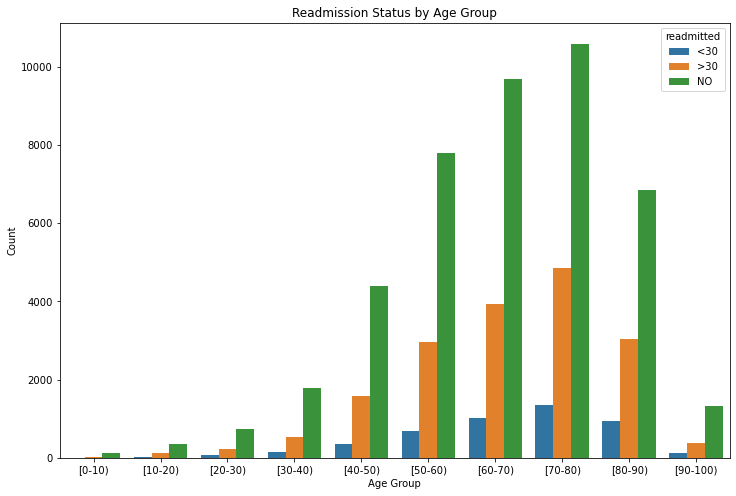

In [71]:
import seaborn as sns

#Readmission vs Age
plt.figure(figsize=(12, 8))
age_order = ['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)', '[60-70)', '[70-80)', '[80-90)', '[90-100)']
sns.countplot(x='age', hue='readmitted', data=data, order=age_order)
plt.title('Readmission Status by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

In [72]:
#VISUALIZING VARIOUS FEATURES

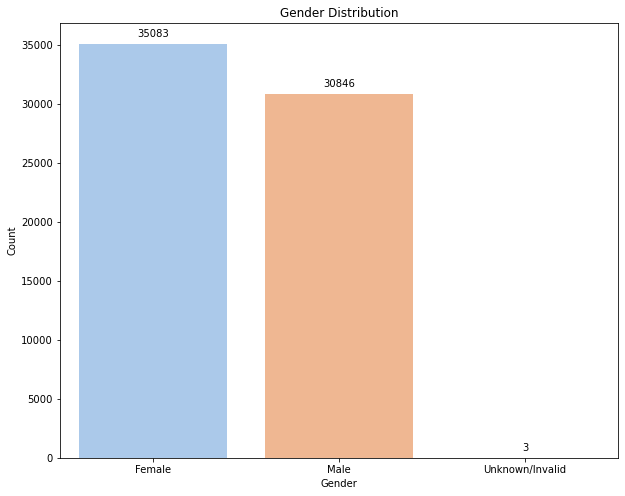

In [73]:
#Gender


plt.figure(figsize=(10, 8))
ax = sns.countplot(x='gender', data=data, palette='pastel')


for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


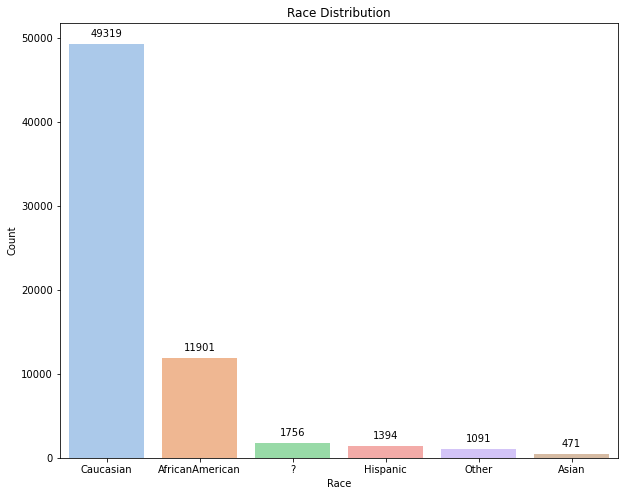

In [74]:
#Race

plt.figure(figsize=(10, 8))
ax = sns.countplot(x='race', data=data, palette='pastel')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Race Distribution')
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()

In [75]:
data.diag_1.value_counts()


414    4596
428    3762
410    2641
786    2504
486    2294
       ... 
983       1
391       1
915       1
52        1
637       1
Name: diag_1, Length: 691, dtype: int64

In [47]:
# Label Encoding

label_encoder = LabelEncoder()

# Fit and transform the 'diag_1' column
data['diag_1_encoded'] = label_encoder.fit_transform(data['diag_1'])
print(data[['diag_1', 'diag_1_encoded']].head(40))

    diag_1  diag_1_encoded
0      161              28
1      440             280
2    250.8             118
3      486             317
4      997             670
5   250.82             120
6      434             275
7      294             157
8    250.7             117
9      996             669
10     410             252
11     V57             682
12     296             159
13     414             256
14     578             388
15     997             670
16     296             159
17     577             387
18     427             268
19     486             317
20      38             230
21     574             384
22     414             256
23     482             314
24     410             252
25     428             269
26     682             464
27     996             669
28     780             521
29     414             256
30     410             252
31     682             464
32     V57             682
33   250.8             118
34   250.7             117
35     414             256
3

In [76]:

data['diag_1'] = pd.to_numeric(data['diag_1'],errors='coerce')

In [83]:

# Label Mapping 
group_mapping = {
    'Circulatory': list(range(390, 460)) + [785],
    'Respiratory': list(range(460, 520)) + [786],
    'Digestive': list(range(520, 580)) + [787],
    'Diabetes': [f'250.{i:02d}' for i in range(0, 100)],  # Include decimals from 250.00 to 250.99
    'Injury': list(range(800, 1000)),
    'Musculoskeletal': list(range(710, 740)),
    'Genitourinary': list(range(580, 630)) + [788],
    'Neoplasms': list(range(140, 240)) + [780, 781, 784] + list(range(790, 800)) + list(range(240, 280)) + list(range(680, 710)) + [782] + list(range(1, 140)) + list(range(290, 320))
}

data['diag_1_group'] = data['diag_1'].apply(lambda x: next((k for k, v in group_mapping.items() if x in v), 'Unknown'))

# Assign numerical values to each category
category_numerical_mapping = {
    'Circulatory': 1,
    'Respiratory': 2,
    'Digestive': 3,
    'Diabetes': 4,
    'Injury': 5,
    'Musculoskeletal': 6,
    'Genitourinary': 7,
    'Neoplasms': 8,
    'Unknown': 0  
}

data['diag_1_numerical'] = data['diag_1_group'].map(category_numerical_mapping)

print(data[['diag_1', 'diag_1_group', 'diag_1_numerical']])

       diag_1     diag_1_group  diag_1_numerical
0       161.0        Neoplasms                 8
1       440.0      Circulatory                 1
2       250.8          Unknown                 0
3       486.0      Respiratory                 2
4       997.0           Injury                 5
...       ...              ...               ...
65927   435.0      Circulatory                 1
65928     8.0        Neoplasms                 8
65929   786.0      Respiratory                 2
65930   722.0  Musculoskeletal                 6
65931   780.0        Neoplasms                 8

[65932 rows x 3 columns]


In [49]:
#Readmission correlation with other 41 features

print(data['readmitted'].dtypes)

object


In [10]:
data['diag_1'].dtype
data['diag_1'] = pd.to_numeric(data['diag_1'],errors='coerce')

In [12]:

mean_diag_1 = data['diag_1'].mean()
data['diag_1'] = data['diag_1'].replace(to_replace=0, value=mean_diag_1)

data['diag_1']

0        276.00
1        648.00
2          8.00
3        197.00
4        414.00
          ...  
91584    250.13
91585    560.00
91586     38.00
91587    996.00
91588    530.00
Name: diag_1, Length: 91589, dtype: float64

In [13]:

data['diag_2'] = pd.to_numeric(data['diag_2'],errors='coerce')
data['diag_3'] = pd.to_numeric(data['diag_3'],errors='coerce')

In [14]:
mean_diag_2 = data['diag_2'].mean()
data['diag_2'] = data['diag_2'].replace(to_replace=0, value=mean_diag_2) 
mean_diag_3 = data['diag_3'].mean()
data['diag_3'] = data['diag_3'].replace(to_replace=0, value=mean_diag_3)

In [18]:
print(corr)

                          encounter_id  patient_nbr  admission_type_id  \
encounter_id                  1.000000     0.513147          -0.159765   
patient_nbr                   0.513147     1.000000          -0.013280   
admission_type_id            -0.159765    -0.013280           1.000000   
discharge_disposition_id     -0.133158    -0.137993           0.082166   
admission_source_id          -0.112400    -0.031882           0.106947   
time_in_hospital             -0.060710    -0.022998          -0.012517   
num_lab_procedures           -0.026486     0.015457          -0.142581   
num_procedures               -0.015324    -0.018171           0.127318   
num_medications               0.076013     0.019753           0.079461   
number_outpatient             0.104015     0.103043           0.026553   
number_emergency              0.082807     0.062133          -0.018572   
number_inpatient              0.031032     0.013405          -0.039997   
diag_1                        0.005756

In [19]:
data.columns


Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [22]:
data.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[10-20),1,1,7,3,59,0,18,...,No,Up,No,No,No,No,No,Ch,Yes,>30
1,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,...,No,No,No,No,No,No,No,No,Yes,NO
2,Caucasian,Male,[30-40),1,1,7,2,44,1,16,...,No,Up,No,No,No,No,No,Ch,Yes,NO
3,Caucasian,Male,[40-50),1,1,7,1,51,0,8,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[50-60),2,1,2,3,31,6,16,...,No,Steady,No,No,No,No,No,No,Yes,>30
